<h1><center><font size="6">Santander Customer Transaction Prediction</font></center></h1>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Another_new_Santander_bank_-_geograph.org.uk_-_1710962.jpg/640px-Another_new_Santander_bank_-_geograph.org.uk_-_1710962.jpg" width="500"></img>

<br>
<b>
    
Inspired from https://www.kaggle.com/jesucristo/santander-magic-lgb-0-901.</b>
     


<a id=1><pre><b>Load Packages</b></pre></a>

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numba import jit
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.cluster import KMeans
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("../input"))



['train.csv', 'sample_submission.csv', 'test.csv']


<a id=1><pre><b>Import the Data</b></pre></a>

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')


In [3]:
# Descriptive statistics train
# shape
print(train.shape)
# types
print(train.dtypes)
# info
print(train.info())
# head
print(train.head(10))
# descriptions, change precision to 2 places
set_option('precision', 1)
train.describe()

(200000, 202)
ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float6

NameError: name 'set_option' is not defined

In [4]:
# Descriptive statistics test
# shape
print(test.shape)
# types
print(test.dtypes)
# info
print(test.info())
# head
print(test.head(10))
# descriptions, change precision to 2 places
set_option('precision', 1)
test.describe()

(200000, 201)
ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float6

NameError: name 'set_option' is not defined

In [5]:
# Analyzing missing values train
print(train.isnull().sum())

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64


In [6]:
# Analyzing missing values test
print(test.isnull().sum())

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64


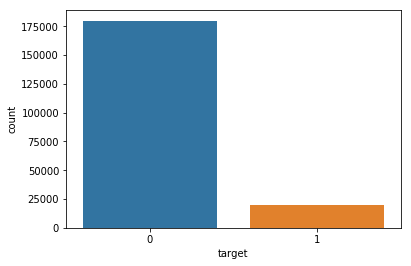

In [7]:
#Data visualization
sns.countplot(train['target'])

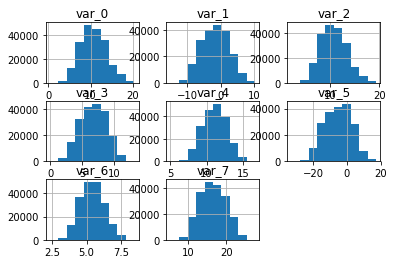

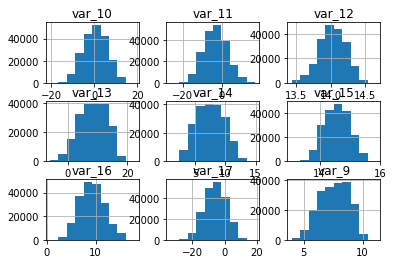

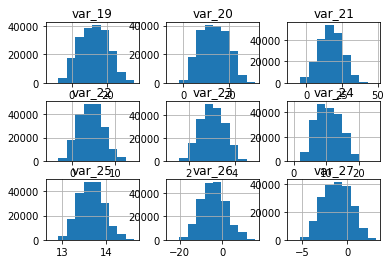

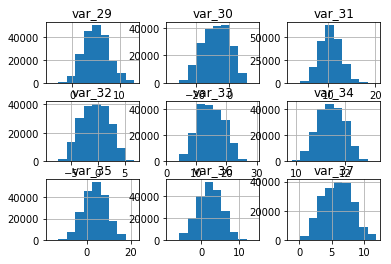

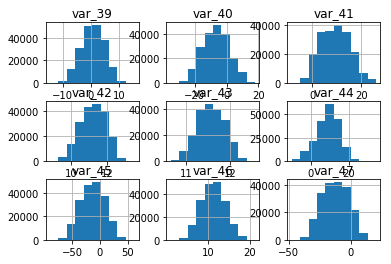

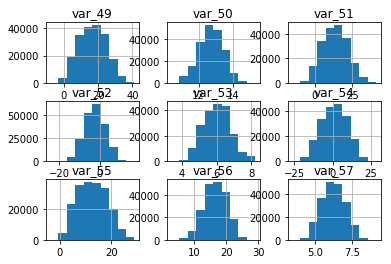

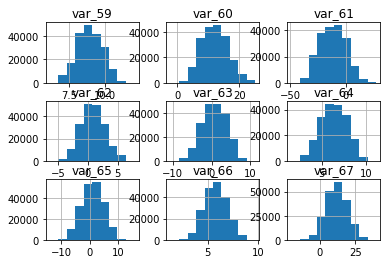

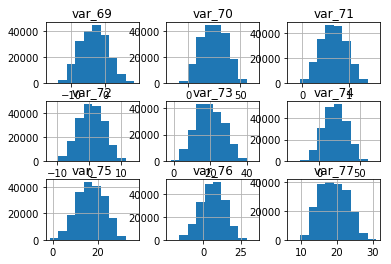

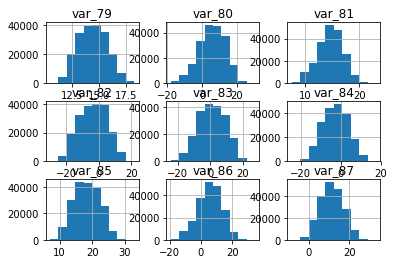

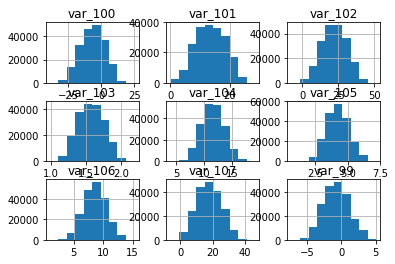

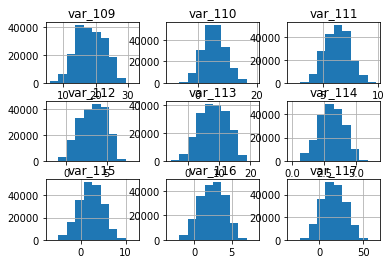

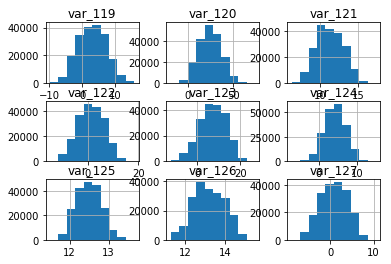

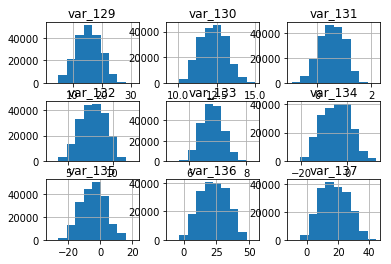

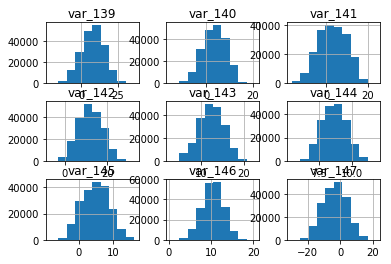

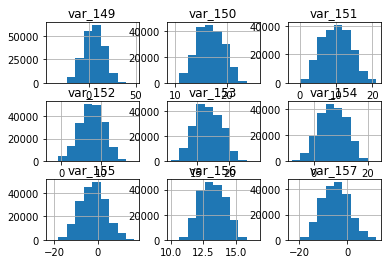

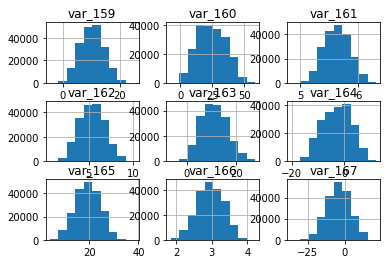

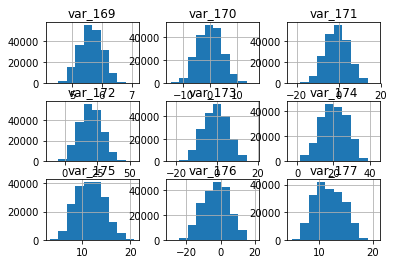

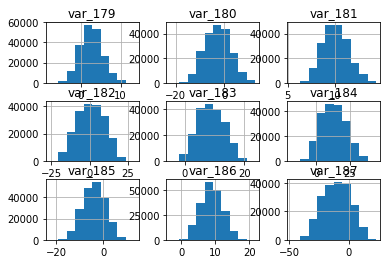

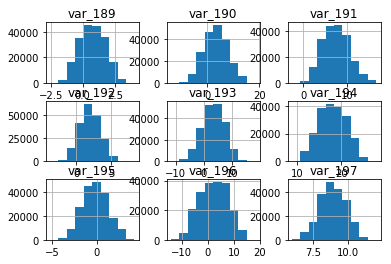

In [10]:
train.iloc[:,2:10].hist()
train.iloc[:,11:20].hist()
train.iloc[:,21:30].hist()
train.iloc[:,31:40].hist()
train.iloc[:,41:50].hist()
train.iloc[:,51:60].hist()
train.iloc[:,61:70].hist()
train.iloc[:,71:80].hist()
train.iloc[:,81:90].hist()
train.iloc[:,101:110].hist()
train.iloc[:,111:120].hist()
train.iloc[:,121:130].hist()
train.iloc[:,131:140].hist()
train.iloc[:,141:150].hist()
train.iloc[:,151:160].hist()
train.iloc[:,161:170].hist()
train.iloc[:,171:180].hist()
train.iloc[:,181:190].hist()
train.iloc[:,191:200].hist()
pyplot.show()

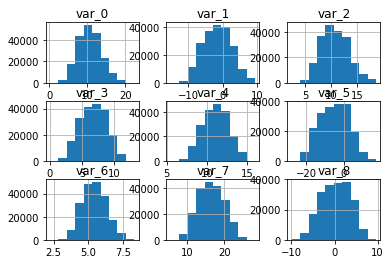

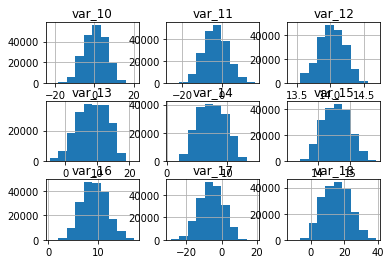

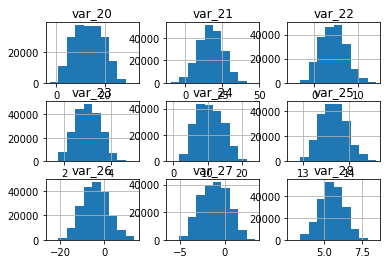

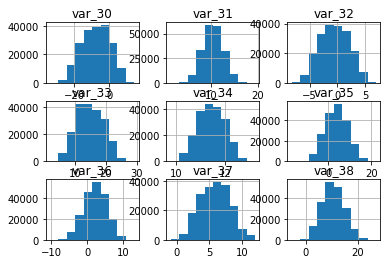

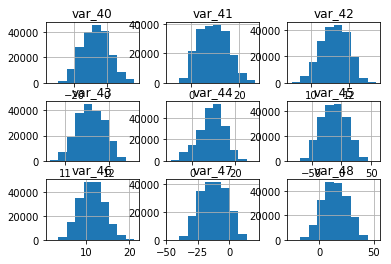

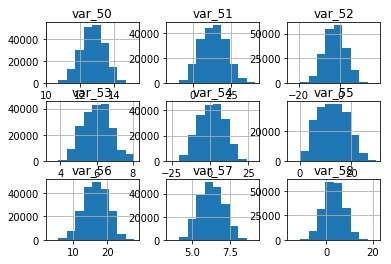

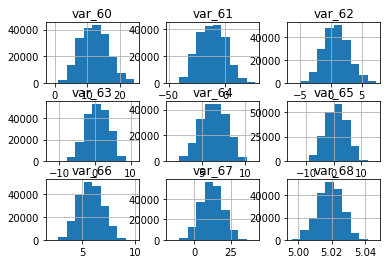

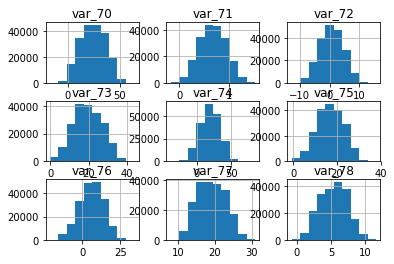

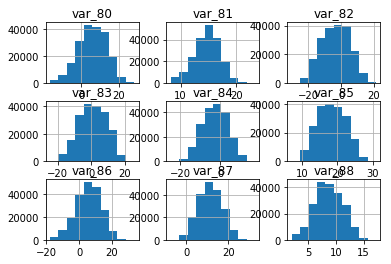

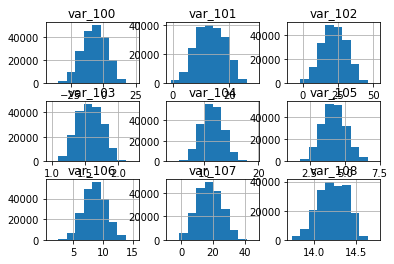

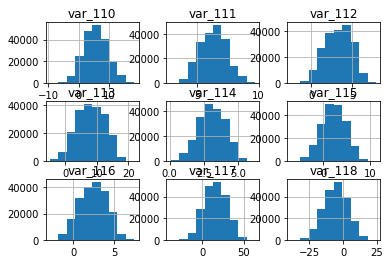

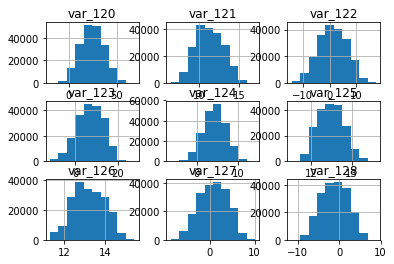

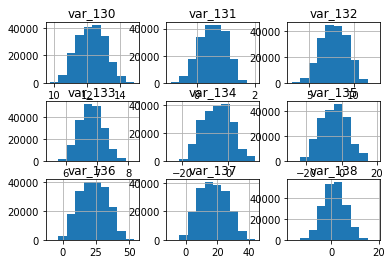

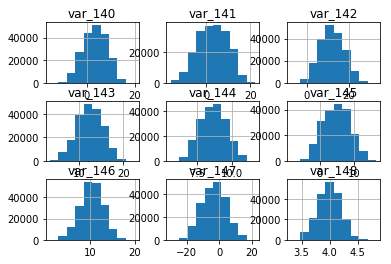

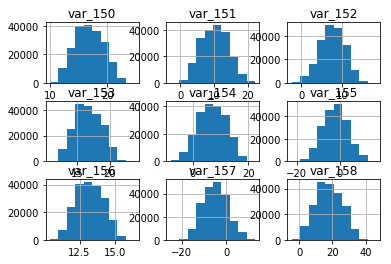

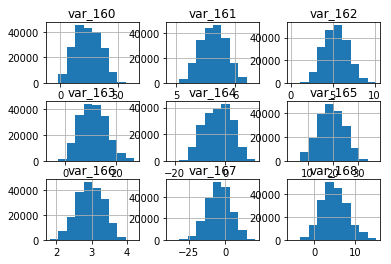

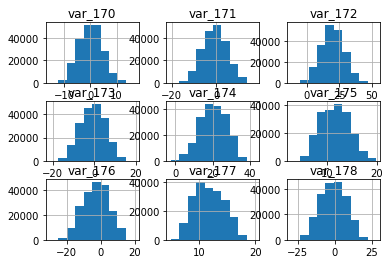

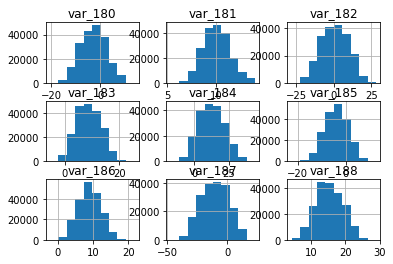

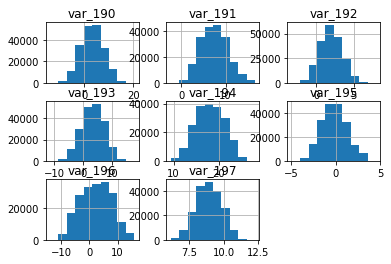

In [11]:
test.iloc[:,1:10].hist()
test.iloc[:,11:20].hist()
test.iloc[:,21:30].hist()
test.iloc[:,31:40].hist()
test.iloc[:,41:50].hist()
test.iloc[:,51:60].hist()
test.iloc[:,61:70].hist()
test.iloc[:,71:80].hist()
test.iloc[:,81:90].hist()
test.iloc[:,101:110].hist()
test.iloc[:,111:120].hist()
test.iloc[:,121:130].hist()
test.iloc[:,131:140].hist()
test.iloc[:,141:150].hist()
test.iloc[:,151:160].hist()
test.iloc[:,161:170].hist()
test.iloc[:,171:180].hist()
test.iloc[:,181:190].hist()
test.iloc[:,191:199].hist()
pyplot.show()

In [12]:
# some baseline features
train['max'] = train.max(axis=1)
train['min'] = train.min(axis=1)
train['mean'] = train.mean(axis=1)
train['sd'] = train.std(axis=1)
test['max'] = test.max(axis=1)
test['min'] = test.min(axis=1)
test['mean'] = test.mean(axis=1)
test['sd'] = test.std(axis=1)

In [13]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,max,min,mean,sd
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,43.1127,-21.4494,7.280697,9.798665
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,40.5632,-47.3797,6.938656,11.184379
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,33.8820,-22.4038,6.169334,9.116233
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,38.1015,-35.1659,6.360431,10.192931
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,41.1037,-65.4863,6.550977,12.513696


In [14]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,max,min,mean,sd
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,42.0248,-31.9891,7.062753,10.505392
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,35.6020,-41.1924,6.158889,10.250999
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,39.3654,-34.3488,7.105329,10.561068
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,40.3383,-21.4797,7.080709,8.756886
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,45.5510,-24.8254,7.150802,10.570586


<a id=1><pre><b>Classification augment</b></pre></a>

In [18]:
@jit
def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

# Build the Light GBM Model

<a id=1><pre><b>Parameters</b></pre></a>

In [19]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [21]:
#kfold = 15
#folds = StratifiedKFold(n_splits=kfold, shuffle=False, random_state=44000)
num_folds = 11
features = [c for c in train.columns if c not in ['ID_code', 'target']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(train))
getVal = np.zeros(len(train))
predictions = np.zeros(len(train.target))
feature_importance_df = pd.DataFrame()

<a id=1><pre><b>Run LGBM model</b></pre></a>

In [23]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, train.target.values)):
    
    X_train, y_train = train.iloc[trn_idx][features], train.target.iloc[trn_idx]
    X_valid, y_valid = train.iloc[val_idx][features], train.target.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train.values, y_train.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

Fold idx:1
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.912645	valid_1's auc: 0.896608
[10000]	training's auc: 0.922587	valid_1's auc: 0.900715
[15000]	training's auc: 0.930164	valid_1's auc: 0.901577
Early stopping, best iteration is:
[14904]	training's auc: 0.930019	valid_1's auc: 0.901623
Fold idx:2
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.913394	valid_1's auc: 0.894711
[10000]	training's auc: 0.923285	valid_1's auc: 0.897993
[15000]	training's auc: 0.930821	valid_1's auc: 0.898271
Early stopping, best iteration is:
[14622]	training's auc: 0.930279	valid_1's auc: 0.898415
Fold idx:3
Training until validation scores don't improve for 4000 rounds.
[5000]	training's auc: 0.912817	valid_1's auc: 0.889574
[10000]	training's auc: 0.922737	valid_1's auc: 0.893276
[15000]	training's auc: 0.93027	valid_1's auc: 0.893724
Early stopping, best iteration is:
[14715]	training's auc: 0.929861	valid_1's auc:

In [25]:
print("\n >> CV score: {:<8.5f}".format(roc_auc_score(train.target, oof)))


 >> CV score: 0.90132 


# Submission

In [26]:
submission = pd.DataFrame({"ID_code": test.ID_code.values})
submission["target"] = predictions
submission.to_csv("submission.csv", index=False)

In [27]:
submission.head()

,ID_code,target
0,test_0,0.140359
1,test_1,0.251449
2,test_2,0.232981
3,test_3,0.313848
4,test_4,0.056704
